In [1]:
import pandas as pd
import numpy as np
import json
import ast

from sklearn.preprocessing import MultiLabelBinarizer

# Loading all data took about ~25 GB of memory; some processing steps take 30+ GB for a single dataset like the user one
csv_folder = 'yelp_dataset_csv'
dataset_folder = "/media/andy/Images/Media/yelp_dataset"

checkin_path = f"{dataset_folder}/yelp_academic_dataset_checkin.json"
business_path = f"{dataset_folder}/yelp_academic_dataset_business.json"
review_path = f"{dataset_folder}/yelp_academic_dataset_review.json"
tips_path = f"{dataset_folder}/yelp_academic_dataset_tip.json"
user_path = f"{dataset_folder}/yelp_academic_dataset_user.json" 

def load_json_data(file_path):
    data_file = open(file_path)
    data = []
    for line in data_file:
        data.append(json.loads(line))
    df = pd.DataFrame(data)
    data_file.close()
    return df



In [2]:
def print_df_info(df):
    print("Columns:", df.columns)
    print("Total Rows:", len(df))
    for column in df.columns:
        print(f"{column} Unique Rows:", df[column].nunique())

def print_df_null_info(df):
    null_vals = ['na', 'null', 'none', 'nan', '', ' ']
    for column in df.columns:
        print(f"{column} Number of Nulls:", df[column].isnull().sum())
        if pd.api.types.infer_dtype(df[column]) == 'string':
            print(f"{column} Number of string Nulls:", df[column].str.lower().isin(null_vals).sum())

In [5]:
df_checkin = load_json_data(checkin_path)
# df_business = load_json_data(business_path)
# df_review = load_json_data(review_path)
# df_tips = load_json_data(tips_path)
# df_user = load_json_data(user_path)

In [73]:
# business_id: string, 22 character business id, maps to business in business.json
# date: string which is a comma-separated list of timestamps for each checkin, each with format YYYY-MM-DD HH:MM:SS
print_df_info(df_checkin)

Columns: Index(['business_id', 'date'], dtype='object')
Total Rows: 138876
business_id Unique Rows: 138876
business_id Number of Nulls: 0
business_id Number of string Nulls: 0
date Unique Rows: 138875
date Number of Nulls: 0
date Number of string Nulls: 0


In [76]:
# This is a multivalued attribute as such I treated each date value as its own separate row
# For example business_id: id_1, date: date_1, date_2 becomes row 1: id_1, date_1; row 2: id_1, date_2;
df_checkin = load_json_data(checkin_path)
df_checkin['date'] = df_checkin.date.str.split(',')
df_checkin = df_checkin.explode('date')
df_checkin.date = df_checkin.date.str.strip()
df_checkin.to_csv(f"{csv_folder}/yelp_academic_dataset_checkin.csv", index=False)

In [79]:
print_df_info(df_checkin)

Columns: Index(['business_id', 'date'], dtype='object')
Total Rows: 18641292
business_id Unique Rows: 138876
business_id Number of Nulls: 0
business_id Number of string Nulls: 0
date Unique Rows: 17748948
date Number of Nulls: 0
date Number of string Nulls: 0


In [80]:
df_checkin

,business_id,date
0,--0r8K_AQ4FZfLsX3ZYRDA,2017-09-03 17:13:59
1,--0zrn43LEaB4jUWTQH_Bg,2010-10-08 22:21:20
1,--0zrn43LEaB4jUWTQH_Bg,2010-11-01 21:29:14
1,--0zrn43LEaB4jUWTQH_Bg,2010-12-23 22:55:45
1,--0zrn43LEaB4jUWTQH_Bg,2011-04-08 17:14:59
...,...,...
138874,zzwK-TJsCJX5wZrdtKemPg,2012-10-02 14:32:18
138874,zzwK-TJsCJX5wZrdtKemPg,2012-11-29 22:23:01
138874,zzwK-TJsCJX5wZrdtKemPg,2014-04-24 23:22:41
138875,zzzKmD9Mj6WtJwJUhA_1dg,2010-12-25 22:17:04


In [4]:
df_business = load_json_data(business_path)

In [24]:
df_business.review_count.value_counts()

5       13844
6       11224
7        9421
8        7849
9        6633
        ...  
991         1
1199        1
1455        1
1583        1
1919        1
Name: review_count, Length: 1281, dtype: int64

In [4]:
df_business[df_business.business_id.eq('CpEkNq0Ek-mtCW0tTRyfsQ')]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
42111,CpEkNq0Ek-mtCW0tTRyfsQ,Peter Pan Mini-Golf,1207 Barton Springs Rd,Austin,TX,78704,30.260278,-97.757744,4.0,305,1,"{'GoodForKids': 'True', 'BikeParking': 'True',...","Mini Golf, Active Life, Golf, Amusement Parks","{'Monday': '9:0-0:0', 'Tuesday': '10:0-22:0', ..."


<AxesSubplot:>

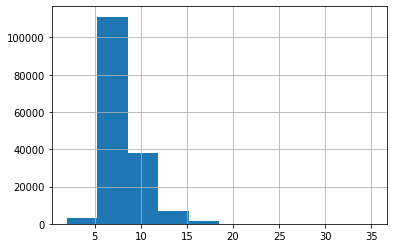

In [5]:
%matplotlib inline
df_business.city.str.len().hist()

In [6]:
df_business[df_business.city.str.len()==35]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
90195,waB9O8vGNo-7bcKMIbFyHw,Localz Urban Cafe,4840 Delta Street,Greater Vancouver Regional District,BC,V4K 2T9,49.090808,-123.085382,4.0,7,1,"{'WiFi': 'u'free'', 'OutdoorSeating': 'True', ...","Coffee & Tea, Food",None


In [7]:
df_business.latitude.describe()

count    160585.000000
mean         38.759794
std           7.138042
min          27.998972
25%          30.355886
50%          42.177366
75%          45.458531
max          49.490000
Name: latitude, dtype: float64

In [8]:
df_business[df_business.name=="Celebration Pediatric Dentistry"]['address'].values

array(['1530 Celebration Blvd, Ste 411, Celebration Pediatric Dentistry'],
      dtype=object)

In [9]:
df_business[df_business.state.str.len()==3]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
129241,WaD_wuvvDFPTrz8ouDPtAw,Kitanoya Guu Garlic,1698 Robson Street,Vancouver,ABE,V6G 1C7,49.29065,-123.133761,4.5,14,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Restaurants, Japanese","{'Monday': '17:30-0:30', 'Tuesday': '17:30-0:3..."


In [10]:
df_business.postal_code.str.len().max()

7

In [11]:
for col in df_business.columns:
    print(f'{col},')

business_id,
name,
address,
city,
state,
postal_code,
latitude,
longitude,
stars,
review_count,
is_open,
attributes,
categories,
hours,


In [12]:
# business_id: string, 22 character unique string business id
# name: string, the business's name
# address: string, the full address of the business
# city: string, the city
# state: string, 2 character state code, if applicable
# postal code: string, the postal code
# latitude: float, latitude
# longitude: float, longitude
# stars: float, star rating, rounded to half-stars
# review_count: integer, number of reviews
# is_open: integer, 0 or 1 for closed or open, respectively
# attributes: object, business attributes to values. note: some attribute values might be objects
# categories: an array of strings of business categories
# hours: an object of key day to value hours, hours are using a 24hr clock
# NOTE attributes and hours are dictionaries

print_df_info(df_business[df_business.columns.drop(['attributes','hours'])])

Columns: Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories'],
      dtype='object')
Total Rows: 160585
business_id Unique Rows: 160585
name Unique Rows: 125850
address Unique Rows: 123895
city Unique Rows: 836
state Unique Rows: 31
postal_code Unique Rows: 5779
latitude Unique Rows: 137397
longitude Unique Rows: 133643
stars Unique Rows: 9
review_count Unique Rows: 1281
is_open Unique Rows: 2
categories Unique Rows: 88115


In [6]:
# Hours is a multi-valued attribute so I treated it as a separate entity / csv file
df_business_hours = df_business[['business_id','hours']].copy()
df_business_hours = df_business_hours.join(pd.DataFrame(df_business_hours.hours.to_dict()).T)
df_business_hours = df_business_hours[df_business_hours.columns.drop('hours')]
df_business_hours = df_business_hours.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_business_hours

,business_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,6iYb2HFDywm3zjuRg0shjw,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0
1,tCbdrRPZA0oiIYSmHG3J0w,5:0-18:0,5:0-17:0,5:0-18:0,5:0-18:0,5:0-18:0,5:0-18:0,5:0-18:0
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,NaN,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0
3,oaepsyvc0J17qwi8cfrOWg,None,None,None,None,None,None,None
4,PE9uqAjdw0E4-8mjGl3wVA,16:0-19:0,16:0-19:0,16:0-19:0,16:0-19:0,16:0-19:0,9:0-11:0,NaN
...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0
160581,bQX-kwVTyZgcdZGEPzce6Q,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,10:0-18:0,9:0-17:0,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,0:0-0:0,NaN,12:0-17:0,19:0-21:0,19:0-21:0,15:30-21:0,16:0-18:0
160583,GB75wPibj3IjNauaoCxyGA,None,None,None,None,None,None,None


In [ ]:
df_business_hours

In [58]:
df_business_hours.Sunday.str.len().max()

11.0

In [126]:
df_business_hours.to_csv(f'{csv_folder}/yelp_academic_dataset_business_hours.csv', index=False)

In [117]:
df_business_hours.describe()

,business_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,160585,121672,126944,129469,130753,130177,113021,83780
unique,160585,1408,1509,1515,1563,1613,1509,1385
top,COx7XZCMnmj9wNzNIILD3A,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0
freq,1,28859,5905,5906,5888,5922,5942,5897


In [123]:
print_df_null_info(df_business_hours)

business_id Number of Nulls: 0
business_id Number of string Nulls: 0
Monday Number of Nulls: 38913
Monday Number of string Nulls: 0
Tuesday Number of Nulls: 33641
Tuesday Number of string Nulls: 0
Wednesday Number of Nulls: 31116
Wednesday Number of string Nulls: 0
Thursday Number of Nulls: 29832
Thursday Number of string Nulls: 0
Friday Number of Nulls: 30408
Friday Number of string Nulls: 0
Saturday Number of Nulls: 47564
Saturday Number of string Nulls: 0
Sunday Number of Nulls: 76805
Sunday Number of string Nulls: 0


In [120]:
# Checking to make sure null values were captured appropriately
df_business_hours[df_business_hours.Monday.isnull()]

,business_id,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,NaN,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0
3,oaepsyvc0J17qwi8cfrOWg,None,None,None,None,None,None,None
7,jFYIsSb7r1QeESVUnXPHBw,NaN,NaN,NaN,NaN,NaN,8:0-14:0,8:0-14:0
13,ufCxltuh56FF4-ZFZ6cVhg,NaN,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0,NaN
14,i_t_30RYVUDdZzFIcw80NQ,NaN,9:0-17:30,9:0-17:30,9:0-17:30,9:0-17:30,9:0-17:30,NaN
...,...,...,...,...,...,...,...,...
160558,HRoRvwxUwgNA2L0qiMRVMw,None,None,None,None,None,None,None
160561,jYgqSazE0gUyI7qq086Dzw,NaN,16:0-21:0,16:0-21:0,16:0-21:0,11:30-21:0,11:30-21:0,11:30-21:0
160570,det-KjTfYoG2JfCZG3v04w,None,None,None,None,None,None,None
160583,GB75wPibj3IjNauaoCxyGA,None,None,None,None,None,None,None


In [5]:
df_business = df_business[df_business.columns.drop('hours')]

In [5]:
df_business_categories = df_business[['business_id','categories']].copy()
df_business_categories.categories = df_business_categories.categories.str.split(',')
df_business_categories

,business_id,categories
0,6iYb2HFDywm3zjuRg0shjw,"[Gastropubs, Food, Beer Gardens, Restaurant..."
1,tCbdrRPZA0oiIYSmHG3J0w,"[Salad, Soup, Sandwiches, Delis, Restauran..."
2,bvN78flM8NLprQ1a1y5dRg,"[Antiques, Fashion, Used, Vintage & Consign..."
3,oaepsyvc0J17qwi8cfrOWg,"[Beauty & Spas, Hair Salons]"
4,PE9uqAjdw0E4-8mjGl3wVA,"[Gyms, Active Life, Interval Training Gyms, ..."
...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,"[Real Estate, Real Estate Services, Home Ser..."
160581,bQX-kwVTyZgcdZGEPzce6Q,"[Health Markets, Food, Specialty Food, Groc..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,"[Arts & Entertainment, Paint & Sip, Art Clas..."
160583,GB75wPibj3IjNauaoCxyGA,"[Cuban, Sandwiches, Restaurants, Cafes]"


In [6]:
df_business_categories_exploded = df_business_categories.explode('categories')
df_business_categories_exploded.categories = df_business_categories_exploded.categories.str.strip()
df_business_categories_exploded

,business_id,categories
0,6iYb2HFDywm3zjuRg0shjw,Gastropubs
0,6iYb2HFDywm3zjuRg0shjw,Food
0,6iYb2HFDywm3zjuRg0shjw,Beer Gardens
0,6iYb2HFDywm3zjuRg0shjw,Restaurants
0,6iYb2HFDywm3zjuRg0shjw,Bars
...,...,...
160584,ngmLL5Y5OT-bYHKU0kKrYA,Restaurants
160584,ngmLL5Y5OT-bYHKU0kKrYA,Middle Eastern
160584,ngmLL5Y5OT-bYHKU0kKrYA,Mediterranean
160584,ngmLL5Y5OT-bYHKU0kKrYA,Persian/Iranian


In [7]:
df_business_categories_exploded.categories.str.len().max()

36.0

In [56]:
df_business_categories_exploded.to_csv(f'{csv_folder}/yelp_academic_dataset_business_categories_exploded.csv', index=False)

In [37]:
df_business_categories_exploded.categories.value_counts()

Restaurants                50763
Food                       29469
Shopping                   26205
Beauty & Spas              16574
Home Services              16465
                           ...  
Sheds & Outdoor Storage        1
Pueblan                        1
Mohels                         1
Castles                        1
Sikh Temples                   1
Name: categories, Length: 1330, dtype: int64

In [55]:
cats = (df_business_categories_exploded.categories.value_counts().index.values)
print(cats)

['Restaurants' 'Food' 'Shopping' ... 'Mohels' 'Castles' 'Sikh Temples']


In [8]:
df_business_categories.categories.str.len().max()
df_business_categories.to_csv(f'{csv_folder}/yelp_academic_dataset_business_categories_raw.csv', index=False)


In [67]:
def check_list(row, string):
    check = False
    if row:
        for elem in row:
            if string in elem:
                check = True
    return check
df_check = df_business_categories.categories.apply(lambda row: check_list(row, '& Pro'))

In [69]:
df_test = df_business_categories[df_check]

In [48]:
categories_list = (df_business_categories.categories.values)

def flatten_list(two_dim_list):
    flat_list = []
    for row in two_dim_list:
        if row:
            try:
                for element in row:
                    flat_list.append(element.strip())
            except:
                print(row)
    return flat_list 

categories = flatten_list(categories_list)
print(len(categories))

708968


In [9]:
category_types = (list(set(categories)))
category_types = pd.DataFrame({'category_types':category_types})
category_types = category_types.sort_values('category_types')
category_types

,category_types
21,& Probates
1081,3D Printing
159,ATV Rentals/Tours
248,Acai Bowls
681,Accessories
...,...
742,Yakiniku
534,Yelp Events
963,Yoga
125,Ziplining


In [14]:
def strip_row(row):
    if row:
        return [elem.strip() for elem in row]


In [15]:

df_business_categories = df_business[['business_id','categories']].copy()
df_business_categories.categories = df_business_categories.categories.str.split(',')
df_business_categories.categories = df_business_categories.categories.apply(lambda row: strip_row(row))

# empty_indices = df_business_categories[df_business_categories.categories.isnull()].index.values
# for index in empty_indices:
#     df_business_categories.iloc[index].categories = []


# mlb = MultiLabelBinarizer(sparse_output=True)

# df_business_categories = df_business_categories.join(
#             pd.DataFrame.sparse.from_spmatrix(
#                 mlb.fit_transform(df_business_categories.pop('categories')),
#                 index=df_business_categories.index,
#                 columns=mlb.classes_))


In [18]:
cols = df_business_categories.columns
cols

Index(['business_id', 'categories'], dtype='object')

In [17]:
df_business_categories

,business_id,categories
0,6iYb2HFDywm3zjuRg0shjw,"[Gastropubs, Food, Beer Gardens, Restaurants, ..."
1,tCbdrRPZA0oiIYSmHG3J0w,"[Salad, Soup, Sandwiches, Delis, Restaurants, ..."
2,bvN78flM8NLprQ1a1y5dRg,"[Antiques, Fashion, Used, Vintage & Consignmen..."
3,oaepsyvc0J17qwi8cfrOWg,"[Beauty & Spas, Hair Salons]"
4,PE9uqAjdw0E4-8mjGl3wVA,"[Gyms, Active Life, Interval Training Gyms, Fi..."
...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,"[Real Estate, Real Estate Services, Home Servi..."
160581,bQX-kwVTyZgcdZGEPzce6Q,"[Health Markets, Food, Specialty Food, Grocery]"
160582,wvFZ06nmPmQ2-IVoPqVYLA,"[Arts & Entertainment, Paint & Sip, Art Classe..."
160583,GB75wPibj3IjNauaoCxyGA,"[Cuban, Sandwiches, Restaurants, Cafes]"


In [78]:
df_business_categories.to_csv(f'{csv_folder}/yelp_academic_dataset_business_categories.csv', index=False)

In [36]:
df_business = df_business[df_business.columns.drop('categories')]

In [57]:
df_business_attributes = df_business[['business_id', 'attributes']].copy()

In [58]:
df_business_attributes = df_business_attributes.join(pd.DataFrame(df_business_attributes.attributes.to_dict()).T)
df_business_attributes = df_business_attributes[df_business_attributes.columns.drop('attributes')]
df_business_attributes = df_business_attributes.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_business_attributes

,business_id,RestaurantsTableService,WiFi,BikeParking,BusinessParking,BusinessAcceptsCreditCards,RestaurantsReservations,WheelchairAccessible,Caters,OutdoorSeating,...,BYOB,CoatCheck,Smoking,DriveThru,BYOBCorkage,Corkage,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Open24Hours
0,6iYb2HFDywm3zjuRg0shjw,True,u'free',True,"{'garage': False, 'street': True, 'validated':...",True,False,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tCbdrRPZA0oiIYSmHG3J0w,NaN,u'free',False,"{'garage': True, 'street': False, 'validated':...",True,False,NaN,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,False,"{'garage': False, 'street': True, 'validated':...",True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oaepsyvc0J17qwi8cfrOWg,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,NaN,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
160581,bQX-kwVTyZgcdZGEPzce6Q,NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,NaN,u'no',NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160583,GB75wPibj3IjNauaoCxyGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_business_attributes.AgesAllowed.value_counts()

u'21plus'     64
u'18plus'     12
u'19plus'     10
u'allages'    10
None           1
Name: AgesAllowed, dtype: int64

In [59]:
# Data in might be as a string in a dictionary format so need to convert the string to dictionary first
def convert_as_literal(row):
    if not pd.isna(row):
        row = ast.literal_eval(row)
    return row

def get_exploded_df(df_orig, column):
    df = df_orig.copy()
    df[column] = df[column].apply(lambda row: convert_as_literal(row))

    df_att = df[['business_id',column]].copy()
    df_att = df_att.join(\
        pd.DataFrame(df_att[column].to_dict()).T)
    df_att = df_att[df_att.columns.drop(column)]
    df_att = df_att.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return df_att

In [137]:
# The following columns are multi-valued attribute so I treated it as a separate entity / csv file
df_business_attributes_business_parking = get_exploded_df(df_business_attributes, 'BusinessParking')
df_business_attributes_business_parking.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes_BusinessParking.csv", index=False)
df_business_attributes_business_parking

,business_id,garage,street,validated,lot,valet
0,6iYb2HFDywm3zjuRg0shjw,False,True,False,False,False
1,tCbdrRPZA0oiIYSmHG3J0w,True,False,False,False,False
2,bvN78flM8NLprQ1a1y5dRg,False,True,False,False,False
3,oaepsyvc0J17qwi8cfrOWg,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,False,False,False,False,False
...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,None,None,None,None,None
160581,bQX-kwVTyZgcdZGEPzce6Q,False,False,False,True,False
160582,wvFZ06nmPmQ2-IVoPqVYLA,NaN,NaN,NaN,NaN,NaN
160583,GB75wPibj3IjNauaoCxyGA,NaN,NaN,NaN,NaN,NaN


In [40]:
df_business_attributes.Ambience

0         {'touristy': False, 'hipster': False, 'romanti...
1         {'romantic': False, 'intimate': False, 'touris...
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
160580                                                 None
160581                                                  NaN
160582                                                  NaN
160583                                                  NaN
160584    {'romantic': False, 'intimate': False, 'classy...
Name: Ambience, Length: 160585, dtype: object

In [138]:
df_business_attributes_ambience = get_exploded_df(df_business_attributes, 'Ambience')
df_business_attributes_ambience.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes_Ambience.csv", index=False)
df_business_attributes_ambience

,business_id,touristy,hipster,romantic,divey,intimate,trendy,upscale,classy,casual
0,6iYb2HFDywm3zjuRg0shjw,False,False,False,False,False,False,False,False,True
1,tCbdrRPZA0oiIYSmHG3J0w,False,False,False,False,False,False,False,False,True
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oaepsyvc0J17qwi8cfrOWg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,None,None,None,None,None,None,None,None,None
160581,bQX-kwVTyZgcdZGEPzce6Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160583,GB75wPibj3IjNauaoCxyGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df_business_attributes_gfm = get_exploded_df(df_business_attributes, 'GoodForMeal')
df_business_attributes_gfm.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes_GoodForMeal.csv", index=False)
df_business_attributes_gfm


,business_id,dessert,latenight,lunch,dinner,brunch,breakfast
0,6iYb2HFDywm3zjuRg0shjw,False,False,False,False,False,False
1,tCbdrRPZA0oiIYSmHG3J0w,False,False,True,False,False,True
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,NaN,NaN,NaN,NaN
3,oaepsyvc0J17qwi8cfrOWg,NaN,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,None,None,None,None,None,None
160581,bQX-kwVTyZgcdZGEPzce6Q,NaN,NaN,NaN,NaN,NaN,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,NaN,NaN,NaN,NaN,NaN,NaN
160583,GB75wPibj3IjNauaoCxyGA,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df_business_attributes_hair = get_exploded_df(df_business_attributes, 'HairSpecializesIn')
df_business_attributes_hair.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes_HairSpecializesIn.csv", index=False)
df_business_attributes_hair

,business_id,straightperms,coloring,extensions,africanamerican,curly,kids,perms,asian
0,6iYb2HFDywm3zjuRg0shjw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tCbdrRPZA0oiIYSmHG3J0w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oaepsyvc0J17qwi8cfrOWg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,None,None,None,None,None,None,None,None
160581,bQX-kwVTyZgcdZGEPzce6Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160583,GB75wPibj3IjNauaoCxyGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df_business_attributes_best_nights = get_exploded_df(df_business_attributes, 'BestNights')
df_business_attributes_best_nights.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes_BestNights.csv", index=False)
df_business_attributes_best_nights

,business_id,monday,tuesday,friday,wednesday,thursday,sunday,saturday
0,6iYb2HFDywm3zjuRg0shjw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tCbdrRPZA0oiIYSmHG3J0w,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oaepsyvc0J17qwi8cfrOWg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,None,None,None,None,None,None,None
160581,bQX-kwVTyZgcdZGEPzce6Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160583,GB75wPibj3IjNauaoCxyGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df_business_attributes_music = get_exploded_df(df_business_attributes, 'Music')
df_business_attributes_music.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes_Music.csv", index=False)
df_business_attributes_music

,business_id,dj,background_music,no_music,jukebox,live,video,karaoke
0,6iYb2HFDywm3zjuRg0shjw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tCbdrRPZA0oiIYSmHG3J0w,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oaepsyvc0J17qwi8cfrOWg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,None,None,None,None,None,None,None
160581,bQX-kwVTyZgcdZGEPzce6Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160583,GB75wPibj3IjNauaoCxyGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df_business_attributes_diet = get_exploded_df(df_business_attributes, 'DietaryRestrictions')
df_business_attributes_diet.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes_DietaryRestrictions.csv", index=False)
df_business_attributes_diet

,business_id,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian
0,6iYb2HFDywm3zjuRg0shjw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tCbdrRPZA0oiIYSmHG3J0w,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bvN78flM8NLprQ1a1y5dRg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,oaepsyvc0J17qwi8cfrOWg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,None,None,None,None,None,None,None
160581,bQX-kwVTyZgcdZGEPzce6Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160583,GB75wPibj3IjNauaoCxyGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_business_attributes = df_business[['business_id', 'attributes']].copy()
df_business_attributes = df_business_attributes.join(pd.DataFrame(df_business_attributes.attributes.to_dict()).T)
df_business_attributes = df_business_attributes[df_business_attributes.columns.drop('attributes')]
df_business_attributes = df_business_attributes.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df_business_attributes = df_business_attributes[df_business_attributes.columns.drop(\
    ['BusinessParking','Ambience','GoodForMeal','HairSpecializesIn','BestNights','Music','DietaryRestrictions'])]

In [61]:
# The following have unicode strings mixed with regular strings:
literal_cols = [ 'WiFi', 'Alcohol', 'NoiseLevel', 'RestaurantsAttire', 'Smoking', 'BYOBCorkage', 'AgesAllowed' ]

for col in literal_cols:
    df_business_attributes[col] = df_business_attributes[col].apply(lambda row: convert_as_literal(row))

In [63]:
df_business_attributes.RestaurantsTableService.value_counts()

True     11243
False     8147
None        10
Name: RestaurantsTableService, dtype: int64

In [92]:
df_business_attributes.BYOBCorkage.value_counts()

no             2163
yes_free       1189
yes_corkage     303
Name: BYOBCorkage, dtype: int64

In [131]:
print(len(df_business_attributes))
test_col = df_business_attributes.RestaurantsPriceRange2.copy()
test_col = test_col.dropna()
test_col.value_counts()

160585


2       51750
1       31080
3        8170
4        1418
None       24
Name: RestaurantsPriceRange2, dtype: int64

In [124]:
df_business_attributes_raw = df_business_attributes.copy()
list_attributes = ['WiFi', 'Alcohol','NoiseLevel','RestaurantsAttire','Smoking','AgesAllowed','RestaurantsPriceRange2','BYOBCorkage']
bool_attributes = df_business_attributes.columns.drop(list_attributes)

business_id = []
attributes = []

def change_list_vals(row, col):
    if not pd.isna(row):
        return f"{row}_{col}"


for col in bool_attributes[1:]:
    df_col = df_business_attributes_raw[['business_id',col]]
    df_col[col].mask(df_col[col]=='True', col, inplace=True)
    df_col[col].where(df_col[col]==col, pd.NA, inplace=True)

    df_col = df_col.dropna()
    business_id.extend(df_col.business_id.values)
    attributes.extend(df_col[col].values)

for col in list_attributes:
    df_col = df_business_attributes_raw[['business_id',col]]
    df_col[col] = df_col[col].apply(lambda row: change_list_vals(row, col))

    df_col = df_col.dropna()
    print(col, df_col[col].value_counts())
    business_id.extend(df_col.business_id.values)
    attributes.extend(df_col[col].values)


df_business_attributes_exploded = pd.DataFrame({'business_id':business_id,'attribute':attributes})
df_business_attributes_exploded
    # print(col)
# attributes_cols

/home/andy/.local/lib/python3.8/site-packages/pandas/core/generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(
/home/andy/.local/lib/python3.8/site-packages/pandas/core/generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(
/home/andy/.local/lib/python3.8/site-packages/pandas/core/generic.py:9286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(
/home/andy/.loca

WiFi free_WiFi    36750
no_WiFi      21537
paid_WiFi      679
Name: WiFi, dtype: int64
Alcohol none_Alcohol             19751
full_bar_Alcohol         16362
beer_and_wine_Alcohol     8305
Name: Alcohol, dtype: int64
NoiseLevel average_NoiseLevel      26929
quiet_NoiseLevel         7829
loud_NoiseLevel          3099
very_loud_NoiseLevel     1317
Name: NoiseLevel, dtype: int64


<ipython-input-124-251ed45a2966>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col[col] = df_col[col].apply(lambda row: change_list_vals(row, col))
<ipython-input-124-251ed45a2966>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col[col] = df_col[col].apply(lambda row: change_list_vals(row, col))
<ipython-input-124-251ed45a2966>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

RestaurantsAttire casual_RestaurantsAttire    39818
dressy_RestaurantsAttire      827
formal_RestaurantsAttire       63
Name: RestaurantsAttire, dtype: int64
Smoking no_Smoking         2559
outdoor_Smoking    1653
yes_Smoking         202
Name: Smoking, dtype: int64
AgesAllowed 21plus_AgesAllowed     64
18plus_AgesAllowed     12
allages_AgesAllowed    10
19plus_AgesAllowed     10
Name: AgesAllowed, dtype: int64


<ipython-input-124-251ed45a2966>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col[col] = df_col[col].apply(lambda row: change_list_vals(row, col))
<ipython-input-124-251ed45a2966>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col[col] = df_col[col].apply(lambda row: change_list_vals(row, col))
<ipython-input-124-251ed45a2966>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

RestaurantsPriceRange2 2_RestaurantsPriceRange2       51750
1_RestaurantsPriceRange2       31080
3_RestaurantsPriceRange2        8170
4_RestaurantsPriceRange2        1418
None_RestaurantsPriceRange2       24
Name: RestaurantsPriceRange2, dtype: int64
BYOBCorkage no_BYOBCorkage             2163
yes_free_BYOBCorkage       1189
yes_corkage_BYOBCorkage     303
Name: BYOBCorkage, dtype: int64


,business_id,attribute
0,6iYb2HFDywm3zjuRg0shjw,RestaurantsTableService
1,jGennaZUr2MsJyRhijNBfA,RestaurantsTableService
2,NRPemqVb4qpWFF0Avq_6OQ,RestaurantsTableService
3,TRToVIbaVtu1KOE8DR9gCw,RestaurantsTableService
4,Mf9io8WkMyGautXuSSfGTg,RestaurantsTableService
...,...,...
800640,2Puvh1tZnbEuIimMv0hJ5Q,yes_free_BYOBCorkage
800641,OF1RGkYOeT2xxoi_Xnec7w,yes_corkage_BYOBCorkage
800642,DXLu9SHnP7eUujx6kcLgmQ,no_BYOBCorkage
800643,m5eUPVD0Hu39Ff-Uqe-FLA,no_BYOBCorkage


In [138]:
df_business_attributes_exploded = df_business_attributes_exploded[~df_business_attributes_exploded.attribute.str.contains('none')]
df_business_attributes_exploded

,business_id,attribute
0,6iYb2HFDywm3zjuRg0shjw,RestaurantsTableService
1,jGennaZUr2MsJyRhijNBfA,RestaurantsTableService
2,NRPemqVb4qpWFF0Avq_6OQ,RestaurantsTableService
3,TRToVIbaVtu1KOE8DR9gCw,RestaurantsTableService
4,Mf9io8WkMyGautXuSSfGTg,RestaurantsTableService
...,...,...
800640,2Puvh1tZnbEuIimMv0hJ5Q,yes_free_BYOBCorkage
800641,OF1RGkYOeT2xxoi_Xnec7w,yes_corkage_BYOBCorkage
800642,DXLu9SHnP7eUujx6kcLgmQ,no_BYOBCorkage
800643,m5eUPVD0Hu39Ff-Uqe-FLA,no_BYOBCorkage


In [140]:
df_business_attributes_exploded.attribute.str.len().max()

27

In [139]:
df_business_attributes_exploded.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes_exploded.csv", index=False)

In [146]:
for column in df_business_attributes.columns:
    print(column)
    print(df_business_attributes[column].value_counts())
    print('\n')

business_id
dYhi_GXaEY8vorpFBDgTmA    1
DZeah7QtYvQ3zTKw5d39oA    1
5hm0ZYYeYCsKpadnzQwK_w    1
YWgh-6VB8QeEUMrk5O_dyw    1
4XmxVasuF7Q6TEtIbpB8cQ    1
                         ..
XCsvrQ7CNQBBQKhv1OHoIg    1
gC38OYXY84kBq6bE2TfxaQ    1
UaN4oeEEmXU9KPtcnuW1GA    1
uXoaKaYtF5XIePMtU26FDg    1
-L3wbCUR0emZSyUXoJnY2g    1
Name: business_id, Length: 160585, dtype: int64


RestaurantsTableService
True     11243
False     8147
None        10
Name: RestaurantsTableService, dtype: int64


WiFi
free    36750
no      21537
paid      679
Name: WiFi, dtype: int64


BikeParking
True     61365
False    15057
None        58
Name: BikeParking, dtype: int64


BusinessAcceptsCreditCards
True     113019
False      7105
None         53
Name: BusinessAcceptsCreditCards, dtype: int64


RestaurantsReservations
False    30081
True     15315
None       211
Name: RestaurantsReservations, dtype: int64


WheelchairAccessible
True     26329
False     3016
None        25
Name: WheelchairAccessible, dtype: int64


Ca

In [148]:
df_business_attributes.to_csv(f"{csv_folder}/yelp_academic_dataset_business_attributes.csv", index=False)

In [151]:
df_business = load_json_data(business_path)
df_business = df_business[df_business.columns.drop(['hours','categories','attributes'])]


In [153]:
for column in df_business.columns:
    print(column)
    print(df_business[column].value_counts())
    print('\n')

business_id
dYhi_GXaEY8vorpFBDgTmA    1
DZeah7QtYvQ3zTKw5d39oA    1
5hm0ZYYeYCsKpadnzQwK_w    1
YWgh-6VB8QeEUMrk5O_dyw    1
4XmxVasuF7Q6TEtIbpB8cQ    1
                         ..
XCsvrQ7CNQBBQKhv1OHoIg    1
gC38OYXY84kBq6bE2TfxaQ    1
UaN4oeEEmXU9KPtcnuW1GA    1
uXoaKaYtF5XIePMtU26FDg    1
-L3wbCUR0emZSyUXoJnY2g    1
Name: business_id, Length: 160585, dtype: int64


name
Starbucks                            852
Subway                               530
McDonald's                           525
Dunkin'                              507
CVS Pharmacy                         301
                                    ... 
Carving Board Deli                     1
L'Altro Buca                           1
Madras Woodlands                       1
ATX Roofing & General Contracting      1
City Garden                            1
Name: name, Length: 125850, dtype: int64


address
                          6726
6000 N Terminal Pkwy       106
250 Granite St              82
1245 Worcester St           79

In [154]:
df_business.to_csv(f"{csv_folder}/yelp_academic_dataset_business.csv", index=False)

In [163]:
# text: string, text of the tip
# date: string, when the tip was written, formatted like YYYY-MM-DD
# compliment: integer, how many compliments it has
# business_id: string, 22 character business id, maps to business in business.json
# user_id: string, 22 character unique user id, maps to the user in user.json

In [3]:
df_tips = load_json_data(tips_path)
df_tips

,user_id,business_id,text,date,compliment_count
0,WCjg0jdHXMlwbqS9tZUx8Q,ENwBByjpoa5Gg7tKgxqwLg,Carne asada chips...,2011-07-22 19:07:35,0
1,42-Z02y9bABShAGZhuSzrQ,jKO4Og6ucdX2-YCTKQVYjg,Best happy hour from 3pm to 6pm! $1 off martin...,2014-09-10 07:33:29,0
2,5u7E3LYp_3eB8dLuUBazXQ,9Bto7mky640ocgezVKSfVg,"Nice people, skilled staff, clean location - b...",2013-12-13 23:23:41,0
3,wDWoMG5N9oI4DJ-p7z8EBg,XWFjKtRGZ9khRGtGg2ZvaA,"1/2-price bowling & the ""Very"" Old Fashion are...",2017-07-11 23:07:16,0
4,JmuFlorjjRshHTKzTwNtgg,mkrx0VhSMU3p3uhyJGCoWA,"Solid gold's. Great sauna. Great staff, too. E...",2016-11-30 08:46:36,0
...,...,...,...,...,...
1162114,OAf2rC_Btse6aRc9LCyApw,BYKjzEUv6RksSVm5yqGPDA,Perfect!,2020-05-30 20:01:46,0
1162115,bI5zqhhpU4SlW-5BN6M1uw,C2kDo2CFGP_0073dgMmZNw,Love these guys! My go to place,2015-07-18 17:21:40,0
1162116,vDMl9JwvkRNRVt_rjpQdZg,4CxF8c3MB7VAdY8zFb2cZQ,Overrated.,2020-07-23 04:02:10,0
1162117,iCc7UVah7zE1UwYPP3FcTg,IEHoGw0V5Lbdf4TJU58K0Q,"Best place for men, call for an appointment an...",2020-09-23 23:16:57,0


In [44]:
df_tips.text.str.len().max()

500

In [160]:
df_tips.to_csv(f"{csv_folder}/yelp_academic_dataset_tips.csv", index=False)

In [ ]:
# // string, 22 character unique user id, maps to the user in user.json
# "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

# // string, the user's first name
# "name": "Sebastien",

# // integer, the number of reviews they've written
# "review_count": 56,

# // string, when the user joined Yelp, formatted like YYYY-MM-DD
# "yelping_since": "2011-01-01",

# // array of strings, an array of the user's friend as user_ids
# "friends": [
#     "wqoXYLWmpkEH0YvTmHBsJQ",
#     "KUXLLiJGrjtSsapmxmpvTA",
#     "6e9rJKQC3n0RSKyHLViL-Q"
# ],

# // integer, number of useful votes sent by the user
# "useful": 21,

# // integer, number of funny votes sent by the user
# "funny": 88,

# // integer, number of cool votes sent by the user
# "cool": 15,

# // integer, number of fans the user has
# "fans": 1032,

# // array of integers, the years the user was elite
# "elite": [
#     2012,
#     2013
# ],

# // float, average rating of all reviews
# "average_stars": 4.31,

# // integer, number of hot compliments received by the user
# "compliment_hot": 339,

# // integer, number of more compliments received by the user
# "compliment_more": 668,

# // integer, number of profile compliments received by the user
# "compliment_profile": 42,

# // integer, number of cute compliments received by the user
# "compliment_cute": 62,

# // integer, number of list compliments received by the user
# "compliment_list": 37,

# // integer, number of note compliments received by the user
# "compliment_note": 356,

# // integer, number of plain compliments received by the user
# "compliment_plain": 68,

# // integer, number of cool compliments received by the user
# "compliment_cool": 91,

# // integer, number of funny compliments received by the user
# "compliment_funny": 99,

# // integer, number of writer compliments received by the user
# "compliment_writer": 95,

# // integer, number of photo compliments received by the user
# "compliment_photos": 50

In [8]:
df_user = load_json_data(user_path)
df_user.tail()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
2189452,OrXXOTSQG2hLEoZ4sw03Gg,Matthew,1,2018-08-25 23:07:58,0,1,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
2189453,pYZ4Dyx5I92u5gDfGiVTpQ,Jeff,3,2013-08-17 23:58:29,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
2189454,DhrXTJRTLhnvI9UI1q63mg,Emily,10,2012-10-14 23:35:51,3,0,2,,None,0,...,0,0,0,0,0,1,0,0,0,0
2189455,ka06dBaC9tvKhc7DJ9_7wQ,Duamel,9,2016-03-24 11:54:52,4,2,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
2189456,QfkFTrJ_MdM3Onk6przUJw,Amanda,2,2011-09-15 16:55:59,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_user.compliment_funny.value_counts()

0       1935144
1        120077
2         35131
3         18082
4         11362
         ...   
851           1
858           1
2907          1
859           1
4093          1
Name: compliment_funny, Length: 1581, dtype: int64

In [20]:
len(df_user.compliment_hot)

2189457

In [42]:
df_user.name.str.len().max()

32

In [25]:
df_user_friends = df_user[['user_id','friends']].copy()


In [26]:
df_user_friends = df_user_friends[df_user_friends.friends != 'None']
df_user_friends.friends = df_user_friends.friends.str.split(',')
df_user_friends

,user_id,friends
0,q_QQ5kBBwlCcbL1s4NVK3g,"[xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UW..."
1,dIIKEfOgo0KqUfGQvGikPg,"[XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdP..."
2,D6ErcUnFALnCQN4b1W_TlA,"[GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPl..."
3,JnPIjvC0cmooNDfsa9BmXg,"[HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyD..."
4,37Hc8hr3cw0iHLoPzLK6Ow,"[-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_B..."
...,...,...
2187447,JwteYghRMwnrXLyKhBQqNA,[MV9vnsaZwcarOXvS4hL0Wg]
2188112,Wgc7jVQmLnwBPU8QgCKDmA,[p6L5kxRzqrmVQWTJiGHHdg]
2188113,38Uu4S7InkGF504pkTallw,[WlLqXn7DNVU7kFM_mZtiuA]
2188114,clcCCI40zcHdDufp8Pu25Q,[wfvtOrGyJbYS61qjaHcJng]


In [8]:
df_user_friends = df_user_friends.explode('friends')
df_user_friends

,user_id,friends
0,q_QQ5kBBwlCcbL1s4NVK3g,xBDpTUbai0DXrvxCe3X16Q
0,q_QQ5kBBwlCcbL1s4NVK3g,7GPNBO496aecrjJfW6UWtg
0,q_QQ5kBBwlCcbL1s4NVK3g,gUfHciSP7BbxZd5gj-c4xw
0,q_QQ5kBBwlCcbL1s4NVK3g,NXw0bCLF5ZtFMfhcj7CFSw
0,q_QQ5kBBwlCcbL1s4NVK3g,OGjmMxPuIoLTJ3O-CO2A4g
...,...,...
2187447,JwteYghRMwnrXLyKhBQqNA,MV9vnsaZwcarOXvS4hL0Wg
2188112,Wgc7jVQmLnwBPU8QgCKDmA,p6L5kxRzqrmVQWTJiGHHdg
2188113,38Uu4S7InkGF504pkTallw,WlLqXn7DNVU7kFM_mZtiuA
2188114,clcCCI40zcHdDufp8Pu25Q,wfvtOrGyJbYS61qjaHcJng


In [10]:
df_user_friends.friends = df_user_friends.friends.str.strip()
df_user_friends

,user_id,friends
0,q_QQ5kBBwlCcbL1s4NVK3g,xBDpTUbai0DXrvxCe3X16Q
0,q_QQ5kBBwlCcbL1s4NVK3g,7GPNBO496aecrjJfW6UWtg
0,q_QQ5kBBwlCcbL1s4NVK3g,gUfHciSP7BbxZd5gj-c4xw
0,q_QQ5kBBwlCcbL1s4NVK3g,NXw0bCLF5ZtFMfhcj7CFSw
0,q_QQ5kBBwlCcbL1s4NVK3g,OGjmMxPuIoLTJ3O-CO2A4g
...,...,...
2187447,JwteYghRMwnrXLyKhBQqNA,MV9vnsaZwcarOXvS4hL0Wg
2188112,Wgc7jVQmLnwBPU8QgCKDmA,p6L5kxRzqrmVQWTJiGHHdg
2188113,38Uu4S7InkGF504pkTallw,WlLqXn7DNVU7kFM_mZtiuA
2188114,clcCCI40zcHdDufp8Pu25Q,wfvtOrGyJbYS61qjaHcJng


In [11]:
df_user_friends.to_csv(f"{csv_folder}/yelp_academic_dataset_user_friends.csv", index=False)

In [19]:
df_user_friends.friends.str.len().value_counts()

22    115084969
Name: friends, dtype: int64

In [27]:
df_user = df_user[df_user.columns.drop('friends')]
df_user

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014",1357,3.85,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...",1025,4.09,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011",16,3.76,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014",420,3.77,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011",47,3.72,...,19,32,16,15,77,131,310,310,98,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189452,OrXXOTSQG2hLEoZ4sw03Gg,Matthew,1,2018-08-25 23:07:58,0,1,0,,0,1.00,...,0,0,0,0,0,0,0,0,0,0
2189453,pYZ4Dyx5I92u5gDfGiVTpQ,Jeff,3,2013-08-17 23:58:29,0,0,0,,0,4.33,...,0,0,0,0,0,0,0,0,0,0
2189454,DhrXTJRTLhnvI9UI1q63mg,Emily,10,2012-10-14 23:35:51,3,0,2,,0,4.20,...,0,0,0,0,0,1,0,0,0,0
2189455,ka06dBaC9tvKhc7DJ9_7wQ,Duamel,9,2016-03-24 11:54:52,4,2,0,,0,3.89,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_user_elite = df_user[['user_id','elite']].copy()
df_user_elite.elite = df_user_elite.elite.str.replace('20,20','2020')
df_user_elite.elite = df_user_elite.elite.str.split(',')
df_user_elite = df_user_elite.explode('elite')
df_user_elite.elite = df_user_elite.elite.str.strip()
df_user_elite.elite.value_counts()

        2094043
2019      47631
2018      44955
2020      42019
2017      39659
2016      32770
2015      27238
2014      20856
2013      18416
2012      17679
2011      12832
2010      10504
2009       6806
2008       4091
2007       2606
2006       1013
Name: elite, dtype: int64

In [ ]:
df_user_elite

In [21]:
df_user_elite.to_csv(f"{csv_folder}/yelp_academic_dataset_user_elite.csv", index=False)

In [21]:
for column in df_user.columns:
    print(column)
    print(df_user[column].value_counts())
    print('\n')

user_id
drPh4cPAdpw8haTch7g2ng    1
Lfgi99PAd14wONc8Dkg8bw    1
oP-wTWRJ95e9lswgoz4_BA    1
jKlZdzLAk4zKL1NTvIXAqA    1
7aBgxN64YFg0U3Nt-UbsWA    1
                         ..
Bfmj3sqSyi2cfj1fb_qOYg    1
AuGkA4Ze5LYAyS2poMgLaQ    1
3tB0eeBtOhnK1BFKKTSAiA    1
xgaOcLaqh4JQjjpfb4mUjw    1
cMkMqgCTOMGgbFOfZVmAnQ    1
Name: user_id, Length: 2189457, dtype: int64


name
John            18838
David           17771
Michael         17513
Chris           15934
Sarah           14136
                ...  
Fowjia              1
MaliaAdrian         1
Lavis               1
IHadToReview        1
Yu-Ling             1
Name: name, Length: 153611, dtype: int64


review_count
1       352766
2       271248
3       208749
4       156239
5       120966
         ...  
1269         1
1268         1
2446         1
2440         1
2043         1
Name: review_count, Length: 1917, dtype: int64


yelping_since
2015-03-29 02:22:29    3
2016-07-09 22:27:12    3
2013-12-08 03:10:51    3
2012-02-04 23:58:44    3
2017-0

In [23]:
df_user = df_user[df_user.columns.drop('elite')]
df_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype='object')

In [24]:
df_user.to_csv(f"{csv_folder}/yelp_academic_dataset_user.csv", index=False)

In [ ]:
# // string, 22 character unique review id
# "review_id": "zdSx_SD6obEhz9VrW9uAWA",

# // string, 22 character unique user id, maps to the user in user.json
# "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

# // string, 22 character business id, maps to business in business.json
# "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

# // integer, star rating
# "stars": 4,

# // string, date formatted YYYY-MM-DD
# "date": "2016-03-09",

# // string, the review itself
# "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

# // integer, number of useful votes received
# "useful": 0,

# // integer, number of funny votes received
# "funny": 0,

# // integer, number of cool votes received
# "cool": 0

In [45]:
df_review = load_json_data(review_path)
df_review

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01
...,...,...,...,...,...,...,...,...,...
8635398,PHnqMOU1pzHbnUMk3Cg2zA,6olZ0y9oW9azON61AhwxYg,yyTtwwQ4JnQMJ2rn3W0S0g,1.0,0,0,0,"In December, I called in (as a returning custo...",2021-01-26 04:07:14
8635399,dViF8gg9745CszpekNvp2g,EPYNZQFuSKqLi-on3U9dFg,RDgwjgbu5xziFIAaNn3WCQ,1.0,13,1,0,This guy is a moron that will stalk and harass...,2019-05-01 21:21:43
8635400,7vNXRIClt-9rFzMXlrtMXA,tr13Jb83h2itjyXVwaO5eA,rbuj2X4SXIc3MDul4dcxIA,5.0,39,13,34,"Yummy, great chew on the bagel\nFriendly staff...",2020-06-13 02:39:26
8635401,Ho57jz6U-JjrGHpGWIGLNg,HqdmRMpNvScFxjGAB40vgQ,IRzjEZ2pX4iOpnBG7oZJ7g,2.0,2,0,0,This used to be my car wash of choice. They di...,2020-06-22 21:54:10


In [46]:
df_review.text.str.len().max()

5000

In [6]:
df_review.to_csv(f"{csv_folder}/yelp_academic_dataset_review.csv", index=False)